# Поле на оси тонкого равномерно заряженного кольца

Рассмотрим кольцо радиуса $a$ с общими зарядом равным $q$. Нужно определить напряженность электрического поля на оси, проходящей через центр кольца. 

![Ring.png](pics/Ring.png)

Как и в случае с заряженной линией, наченм с того, что распололжим по радиусу кольца несколько точечных зарядов и посчитаем суперпозицию напряженностей полей, создаваемых ими. В рассматриваемом случае поле $N$ зарядов $q_i$ будт трехмерным:

$$ \vec{E}(x,y,z) = \sum_{i=1}^N \vec{E}_i(x,y,z) = \frac{1}{4\pi\varepsilon_0} \frac {q_i} {\sqrt{((x -x_i)^2 +(y -y_i)^2 + (z -z_i)^2)}^3} (\vec{i} \ast (x -x_i)+\vec{j}*(y -y_i)+\vec{k}*(z -z_i)) $$

## Функция для трехмерного поля

Как обычно, импортируем библиотеки, которыми мы будем пользоваться в блокноте: NumPy для работы с массивами, Matplotlib для визуализации и math для различных математических функций.

Еще добавим команду %matplotlib inline для встраивания рисунков в блокнот.

In [318]:
import numpy
import math
from matplotlib import pyplot
# отображение картинок в блокноте
%matplotlib inline

Функция из блоконота про заряженную линию поменяется не сильно – добавится третья компонента $E_z$.

In [319]:
def get_field_components(charge, xc, yc, zc, X, Y, Z):
    """
    Returns the electric field generated by a point charge.
    
    Parameters
    ----------
    strength: float
        Strength of the point charge.
    xs: float
        x-coordinate of the point charge.
    ys: float
        y-coordinate of the point charge.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    E_x: 2D Numpy array of floats
        x-component of the vector field.
    E_y: 2D Numpy array of floats
        y-component of the vector field.
    """
    E_x = charge/(4*numpy.pi*eps_0)*(X-xc)/((X-xc)**2+(Y-yc)**2+(Z-zc)**2)**(3/2)
    E_y = charge/(4*numpy.pi*eps_0)*(Y-yc)/((X-xc)**2+(Y-yc)**2+(Z-zc)**2)**(3/2)
    E_z = charge/(4*numpy.pi*eps_0)*(Z-zc)/((X-xc)**2+(Y-yc)**2+(Z-zc)**2)**(3/2)
    
    return E_x, E_y, E_z

In [437]:
eps_0 = 8.85e-12
N = 31                     # Число узлов сетки в каждом направлении
x_start, x_end = -4.0, 4.0            # границы по x
y_start, y_end = -4.0, 4.0            # границы по y
z_start, z_end = -5.0, 5.0            # границы по z
x = numpy.linspace(x_start, x_end, N)    # одномерный массив x
y = numpy.linspace(y_start, y_end, N)    # одномерный массив y
z = numpy.linspace(z_start, z_end, N)    # одномерный массив y
X, Y, Z = numpy.meshgrid(x, y, z)              # создает сетку

Но давайте изменим подход к определению интенсивности суммарного поля. Определим класс `Charge`, описывающий элементарный точечный заряд. Атрибутами класса будут выступать координаты заряда `x`, `y`, `z` и его величина `charge`. Кроме того, у класса будет один метод `field`, с помощью которого будут вычисляться компоненты векторного поля напряженности $E_x, E_y, E_z$. Вычисленные компоненты хранятся в атрибутах `E_x`, `E_y` и `E_z` соответственно.

In [438]:
class Charge:
    """
    Contains information related to a elementary charge.
    """
    def __init__(self, charge, x, y, z):
        """
        Sets the location and strength of the charge.
        
        Parameters
        ----------
        charge: float
            Strength of the charge.
        x: float
            x-coordinate of the charge.
        y: float
            y-coordinate of the charge.
        z: float
            z-coordinate of the charge.
        """
        self.charge = charge
        self.x, self.y, self.z= x, y, z

    def field(self, X, Y, Z):
        """
        Computes the electricity field generated by the charge.
        
        Parameters
        ----------
        X: 2D Numpy array of floats
            x-coordinate of the mesh points.
        Y: 2D Numpy array of floats
            y-coordinate of the mesh points.
        Z: 2D Numpy array of floats
            z-coordinate of the mesh points.
        """
        self.E_x = self.charge/(4*numpy.pi*eps_0)*(X-self.x)/((X-self.x)**2+(Y-self.y)**2+(Z-self.z)**2)**(3/2)
        self.E_y = self.charge/(4*numpy.pi*eps_0)*(Y-self.y)/((X-self.x)**2+(Y-self.y)**2+(Z-self.z)**2)**(3/2)
        self.E_z = self.charge/(4*numpy.pi*eps_0)*(Z-self.z)/((X-self.x)**2+(Y-self.y)**2+(Z-self.z)**2)**(3/2)
        
       

Расположим кольцо радиуса $a=1$ в плоскости $z=0$, центр кольца поместим в начало координат $(0,0,0)$. Заряд кольца $q = 2 \cdot 10^{-11}$, число элементраных зарядов на ней $N_q = 31$

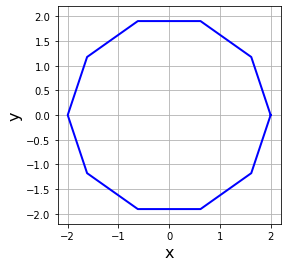

In [439]:
N_charges = 11                      # количество единичных зарядов
Q = 2e-11                           # суммарный заряд кольца
el_charge = Q/N_charges             # интенсивность единичного заряда

# задаем параметры кольца
a = 2.0                                     # радиус
# угловая координата в радианах
theta = numpy.linspace(0, 2*math.pi, N_charges)   
# кольцо в декартовых координатах
x_charge, y_charge = a*numpy.cos(theta), a*numpy.sin(theta)   
z_charge = numpy.zeros(N_charges)

# рисуем кольцо
size = 4
pyplot.figure(figsize=(size, size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.plot(x_charge, y_charge, color='b', linestyle='-', linewidth=2)
pyplot.xlim(-2.2, 2.2)
pyplot.ylim(-2.2, 2.2);

Мы воспользуемся созданным классом `Charge` для создания точечных зарядов, из которых будет состоять рассматриваемое кольцо. Выберем число `N_charges` и вызовем конструктор класса столько раз, при этом изменяя координаты $x$ и $y$ в положении зарядов. Затем вычислим компоненты напряженности поля, наведенные зарядами, используя соответствующую функцию.

In [440]:
# создаем кольцо из элементарных зарядов (Numpy массив объектов типа Source)
charges = numpy.empty(N_charges, dtype=object)
for i in range(N_charges):
    charges[i] = Charge(el_charge, x_charge[i], y_charge[i], z_charge[i])
    charges[i].field(X, Y, Z)

# суперпозиция поля всех зарядов
E_x, E_y, E_z = numpy.zeros_like(X),numpy.zeros_like(X),numpy.zeros_like(X)


for charge in charges:
    E_x += charge.E_x
    E_y += charge.E_y
    E_z += charge.E_z

Получившееся поле можно визуализировать в трехмерном виде.

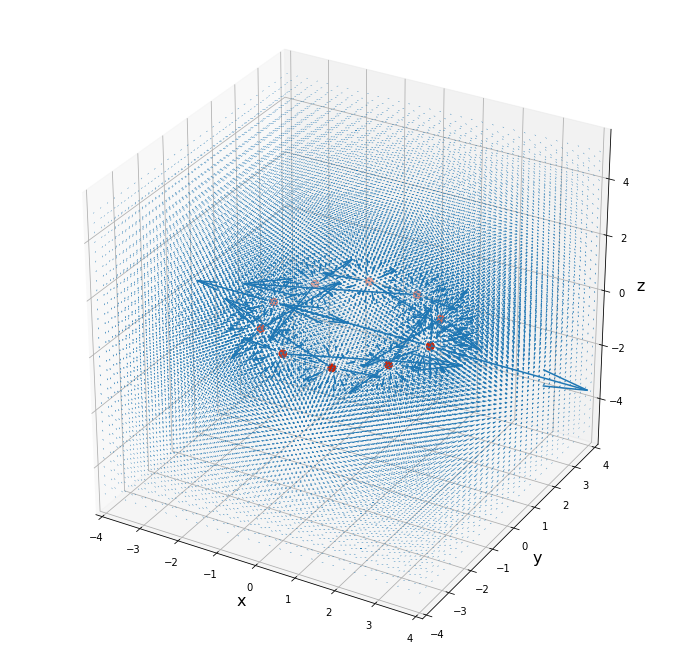

In [441]:
from mpl_toolkits.mplot3d import Axes3D 
fig = pyplot.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

ax.set_xlim(x_start,x_end)
ax.set_ylim(y_start,y_end)

ax.set_xlabel('x',fontsize=16)
ax.set_ylabel('y',fontsize=16)
ax.set_zlabel('z',fontsize=16)

ax.quiver(X, Y, Z, E_x, E_y, E_z, length = 2, normalize=False)
ax.scatter(x_charge,y_charge,z_charge,color='#CD2305', s=60, marker='o');

К сожалению, результат не вполне информативен. Можно заметить симметрию рисунка, и сильно выделяющиеся вектора вблизи точечных зарядов. Последнее – численные ошибки, связанные с тем, что при приближении к нашим элементарным зарядам, изображающим заряженное колцо, знаменатель в формуле для определения напряженности поля обращается в ноль. 

Симметрию же можно использовать, чтобы получить более наглядное представление силовых линий результирующего поля. Сделаем срез плосокстью, проходящей через ось кольца. В нашем случае, это плоскости $x=0$ или $y=0$. Плоскости $x=0$ соответсвует  индекс $N/2$. Он должен быть целочисленным, поэтому используем функцию `round`. Самое сложное – вычленить из трехмерного набора данных нужное нам сечение. В нашем случае, плоскость $x=0$ можно поулчить из трехмерной сетки срезами `Y[:,yplane,:].T, Z[:,yplane,:].T`.

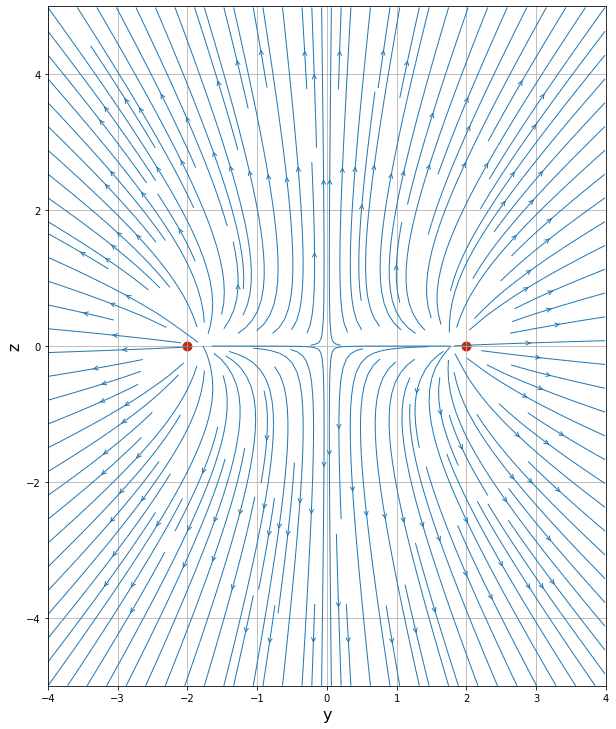

In [442]:
size = 10
yplane = round(N/2)-1
pyplot.figure(figsize=(size, (z_end-z_start)/(y_end-y_start)*size))
pyplot.grid(True)
pyplot.xlabel('y', fontsize=16)
pyplot.ylabel('z', fontsize=16)
pyplot.xlim(y_start, y_end)
pyplot.ylim(z_start, z_end)
stream = pyplot.streamplot(Y[:,yplane,:].T, Z[:,yplane,:].T, E_y[:,yplane,:].T,E_z[:,yplane,:].T, density=2, linewidth=1, arrowsize=1,\
                  arrowstyle='->')
pyplot.scatter([-a,a], [0,0], color='#CD2305', s=80, marker='o');

Получившийся срез можно отобразить в трехмерном представлении:

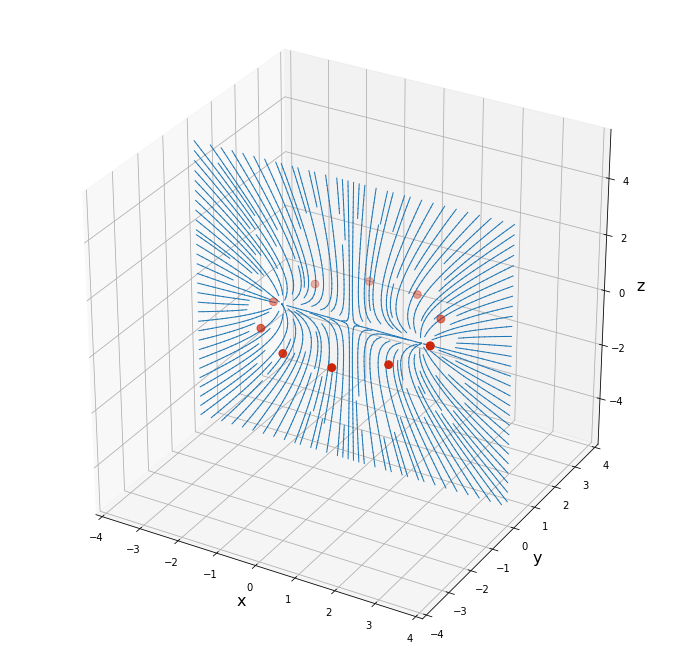

In [443]:
from mpl_toolkits.mplot3d import art3d 
fig = pyplot.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

lines = stream.lines.get_paths()

ax.set_xlim(x_start,x_end)
ax.set_ylim(y_start,y_end)

ax.set_xlabel('x',fontsize=16)
ax.set_ylabel('y',fontsize=16)
ax.set_zlabel('z',fontsize=16)

for line in lines:
    old_x = line.vertices.T[0]
    old_y = line.vertices.T[1]
    # apply for 2d to 3d transformation here
    new_z = old_y
    new_y = numpy.zeros_like(old_x)
    new_x = old_x
    #print (new_x)
    
    ax.plot(new_x, new_y, new_z,linewidth=1, color='#1f77b4')
ax.scatter(x_charge,y_charge,z_charge,color='#CD2305', s=60, marker='o');

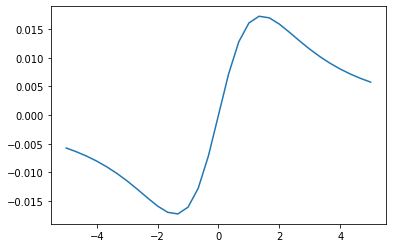

In [444]:
pyplot.plot(Z[yplane,yplane,:].T, E_z[yplane,yplane,:].T)
#pyplot.plot(Z[yplane,yplane,:].T, E_z[8,yplane,:].T,'o')

## Оценка точности

Точное решение на оси $z$:

$$ E(z) = \frac {q}{4\pi\varepsilon_0} \frac{z}{\sqrt{{(a^2+z^2)}^3 }} $$

Запишем соответствующую функцию 

In [445]:
def E_z_theor(charge,radius,z):
    return charge*z/(4*numpy.pi*eps_0)/((radius**2 + z**2)**1.5)

Отобразим на одном графике точное и численное решение на оси кольца.

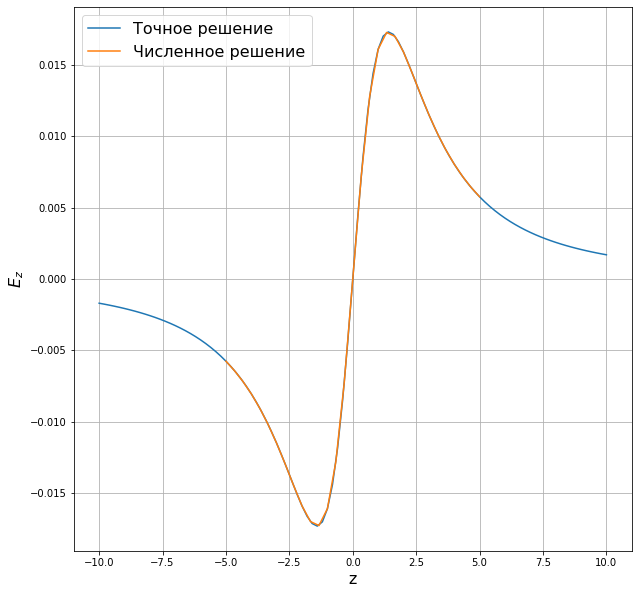

In [447]:
size = 10
z_theor = numpy.linspace(-10, 10, 101)
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('z', fontsize=16)
pyplot.ylabel(r'$E_z$', fontsize=16)
pyplot.plot(z_theor, E_z_theor(Q,a,z_theor), label = 'Точное решение' )
pyplot.plot(Z[yplane,yplane,:].T, E_z[yplane,yplane,:].T, label = 'Численное решение' )
pyplot.legend(loc='best', fontsize=16);

Визуально два решения совпадают. Можно вычислить ошибку: 

In [454]:
max(abs((E_z[yplane,yplane,:]/E_z_theor(Q,a,z) - 1)))

C:\Users\ikurs\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


3.3306690738754696e-16

Как видно из сравнения решений, даже "кольцо", состоящее из 11 точечных зарядов, с хорошей точностью апроксимирует точное решение.